# Moreno Crime

### Task 1

Please start with describing the general properties of the data in terms of the semantic dimension.

Please include the following information:
- number of crimes
- number of persons
- number of person per role
- etc.

### Solution of Task 1

- 551 crime events e
- 829 persons p related to crime events e
- 271 persons $p_0$ with sex 0
- 558 persons $p_1$ with sex 1
- 386 persons $p_S$ within the role "Suspect"
- 330 persons $p_V$ within the role "Victim"
- 113 persons $p_W$ within the role "Witness"

$p_0 \cup p_1 = p = p_S \cup p_V \cup p_W$

---

### Task 2

The data set is a particular kind of social interaction data, where the interactions are relevant to criminal activity. Please start with an affiliation X, i.e. m × n matrix where m is the number of people involved in at least one incident and n is the number of crimes recorded. An entry is one if a person was recorded as part of crime and zero otherwise (this is called incidence matrix).

Construct the affiliation matrix X and determine
- the "rates of participation"
- the number of foci (here crimes) a person is affiliated with
- and the "size of the focus"
- the number of people affiliated with a focus (here crime).

### Solution of Task 2

##### Pre-processing of the data...

- file "data/moreno_crime/out.moreno_crime_crime": deleted header lines in file
- file "data/moreno_crime/out.moreno_crime_crime" saved as "data/moreno_crime/out.moreno_crime_crime.txt"
- file "data/moreno_crime/ent.moreno_crime_crime.person.name" saved as "data/moreno_crime/ent.moreno_crime_crime.person.name.txt"
- file "data/moreno_crime/ent.moreno_crime_crime.person.sex" saved as "data/moreno_crime/ent.moreno_crime_crime.person.sex.txt"
- file "data/moreno_crime/rel.moreno_crime.person.role" saved as "data/moreno_crime/rel.moreno_crime.person.role.txt"

In [1]:
# build data frame for person (only complete data sets)
v.n <- read.table("data/moreno_crime/ent.moreno_crime_crime.person.name.txt")
v.s <- read.table("data/moreno_crime/ent.moreno_crime_crime.person.sex.txt")
v.r <- read.table("data/moreno_crime/rel.moreno_crime_crime.person.role.txt")
v   <- cbind(c(1:829),v.n[1:829,],v.s, v.r[1:829,])

# build data frame for crime events
e   <- read.table("data/moreno_crime/out.moreno_crime_crime.txt")

# rename columns
names(v)[names(v)=="c(1:829)"]     <- "id"
names(v)[names(v)=="v.n[1:829, ]"] <- "name"
names(v)[names(v)=="V1"]           <- "sex"
names(v)[names(v)=="v.r[1:829, ]"] <- "role"
names(e)[names(e)=="V1"]           <- "person"
names(e)[names(e)=="V2"]           <- "events"

# build edge list with additional informations
daf <- merge(v,e,by.x="id", by.y="person")
elist <- data.frame(daf$events, daf$id, daf$name, daf$sex, daf$role)

# rename columns
names(elist)[names(elist)=="daf.events"] <- "e_id"
names(elist)[names(elist)=="daf.id"]     <- "p_id"
names(elist)[names(elist)=="daf.name"]   <- "p_name"
names(elist)[names(elist)=="daf.sex"]    <- "p_sex"
names(elist)[names(elist)=="daf.role"]   <- "p_role"

# final edge lists
el_val <- elist                                   # numeric + string values
el_num <- as.data.frame(lapply(elist,as.numeric)) # only numeric values

In [2]:
require(reshape2) # needed for function "dcast"

# build incidence matrix
X <- as.matrix(dcast(el_num, p_id ~ e_id, value.var = "p_role", fill=0))
X <- X[,2:552]

# building square matrix of X
mzeros <- matrix(0, 829, 278)
m      <- cbind(X,mzeros)

Loading required package: reshape2


In [3]:
# create a graph
library(igraph)
G <- graph.adjacency(m, mode="undirected", weighted=TRUE) # main graph


Attaching package: 'igraph'

The following objects are masked from 'package:stats':

    decompose, spectrum

The following object is masked from 'package:base':

    union



In [4]:
# descriptive statistics
library(Hmisc)
describe(el_val)

# print additional information
cat(cat("mean degree of a node in the network: ~",round(mean(degree(G)),2)), "\n")
cat(cat("mean degree distribution of the network: ~",round(mean(degree_distribution(G)),2)), "\n")
cat(cat("density of the network: ~",round((2*length(e))/(length(v)*(length(v)-1)),2)), "\n")
cat(cat("diameter of the network: ~",round(diameter(G, directed = FALSE, unconnected = TRUE, weights = NULL),2)), "\n\n")

Loading required package: lattice
Loading required package: survival
Loading required package: Formula
Loading required package: ggplot2

Attaching package: 'Hmisc'

The following objects are masked from 'package:base':

    format.pval, round.POSIXt, trunc.POSIXt, units



el_val 

 5  Variables      1476  Observations
--------------------------------------------------------------------------------
e_id 
      n missing  unique    Info    Mean     .05     .10     .25     .50     .75 
   1476       0     551       1   230.8   24.00   40.00   94.75  211.00  358.00 
    .90     .95 
 458.00  501.25 

lowest :   1   2   3   4   5, highest: 547 548 549 550 551 
--------------------------------------------------------------------------------
p_id 
      n missing  unique    Info    Mean     .05     .10     .25     .50     .75 
   1476       0     829       1   406.2   35.75   67.00  190.75  404.50  618.25 
    .90     .95 
 746.00  797.00 

lowest :   1   2   3   4   5, highest: 825 826 827 828 829 
--------------------------------------------------------------------------------
p_name 
      n missing  unique 
   1476       0     829 

lowest : AbelDennis    AbramsChad    AbramsDavid   AbramsDon     AbramsRichard
highest: WittNorma     WolffRodney   WoodsBlai

mean degree of a node in the network: ~ 3.56 
mean degree distribution of the network: ~ 0.04 
density of the network: ~ 0.33 
diameter of the network: ~ 18 



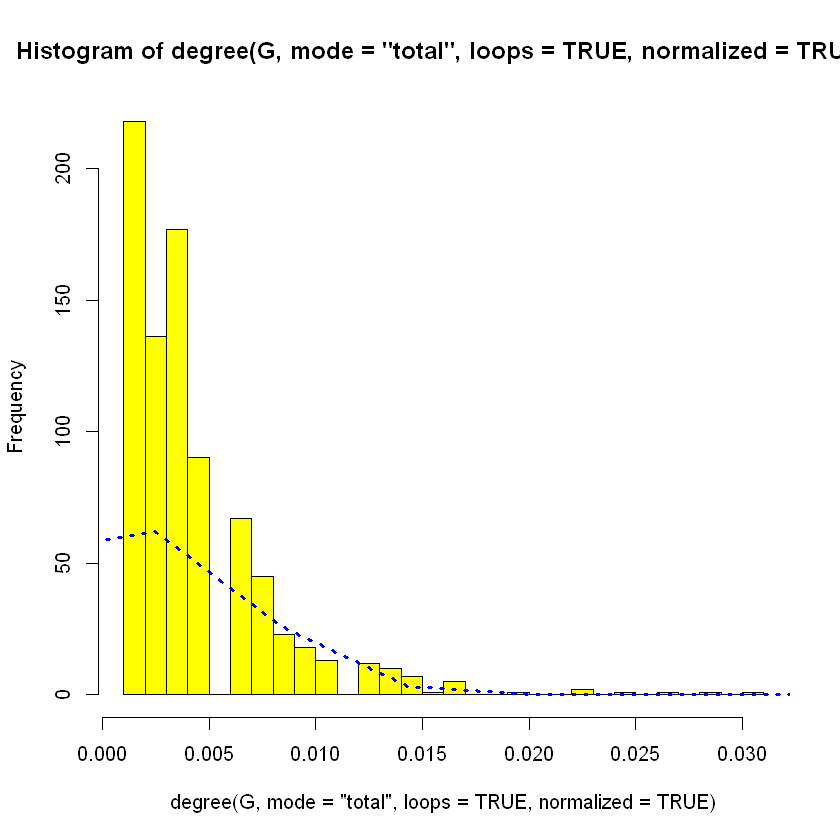

In [5]:
# histogram + normaldist. pdf
histo <- hist(degree(G, mode = "total", loops = TRUE, normalized = TRUE), max(degree(G)), col="yellow") # histogram with 25 bins
pdf <- lines(density(m), lty="dotted", col="blue", lwd=3) # probability density function - normal distribution (wrong here!)

##### Insights:

- pdf is not fitting --> exponential distribution --> scale free network
- an average person p has a relation to 3 to 4 events e
- mean degree distribution of the network: ~ 0.04 
- the density of the network is ~ 0.33
- the diameter of the network is 18

In [6]:
# rates of participation


# number of crimes a person is affiliated with


# size of the crime


# number of people affiliated with a crime

##### Summary

- "rates of participation" = ?
- number of crimes a person is affiliated with = ?
- "size of the crime" = ?
- number of people affiliated with a crime = ~4?

---

### Task 3

Suppose we wish to use a network model to understand the potential interconnectivity of people involved in criminal incidents in other words, we ask whether crimes are somehow connected or not. We would define the nodes of the network to be the list of people and place edges between them if they were recorded as being part of at least one criminal incident together.

Construct the corresponding network co-membership matrix and determine its properties in terms of its
- density,
- reachability,
- connectedness,
- diameter.

### Solution of Task 3

In [7]:
# create needed graph
ne <- merge(e,e,by="events")
ne <- cbind(ne$person.x, ne$person.y, ne$events)
ne[,1] <- as.character(ne[,1])
ne[,2] <- as.character(ne[,2])
ne[,3] <- as.character(ne[,3])

H   <- graph.data.frame(ne)
adj <- get.adjacency(H)

# print additional information
cat(cat("density of the network: ~",round((2*length(E(H)))/(length(V(H))*(length(V(H))-1)),2)), "\n")
cat(cat("reachability/connectedness of the network: ~",round(length(decompose.graph(H)),2)), "components\n")
cat(cat("diameter of the network: ~",round(diameter(H, directed = FALSE, unconnected = TRUE, weights = NULL),2)), "\n\n")

# Histogram of H
#h <- hist(degree(H, mode = "total", loops = TRUE, normalized = TRUE), max(degree(H)), col="yellow")

# delete loops from graph
diag(adj) <- 0
H <- graph.adjacency(adj, "undirected", weighted=NULL, diag=TRUE, add.colnames=NULL, add.rownames=NA)

density of the network: ~ 0.02 
reachability/connectedness of the network: ~ 20 components
diameter of the network: ~ 16 



---

### Task 4

In the next step, you want to characterises the crimes.

- Construct the corresponding network and describes its properties.
- What does the data tell you?
- What further questions can you derive?

density of the network: ~ 0.04 
reachability/connectedness of the network: ~ 20 components
diameter of the network: ~ 15 



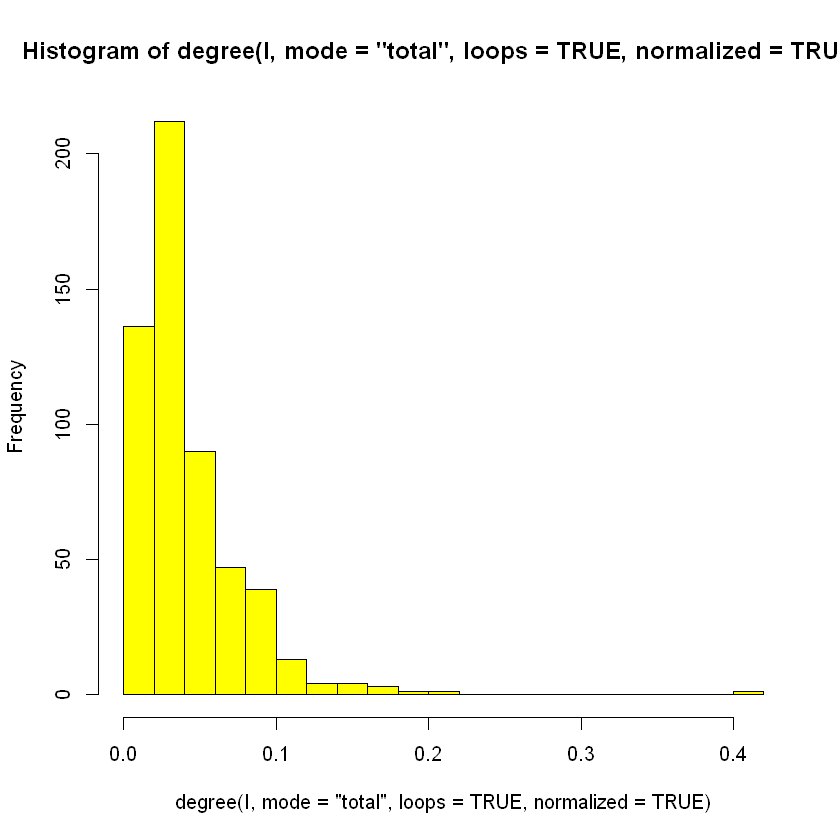

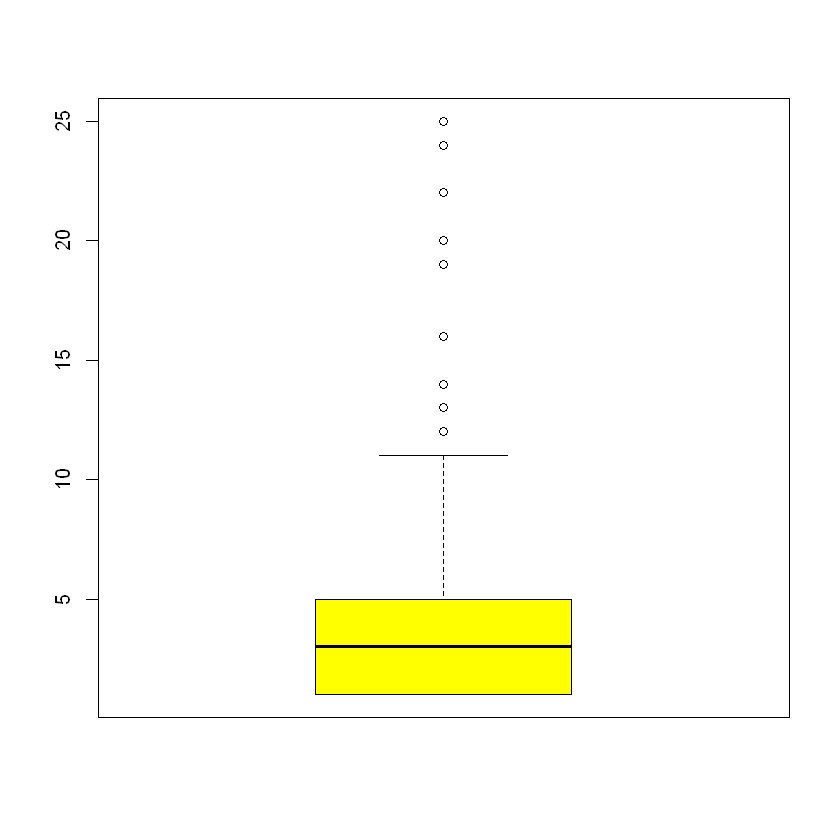

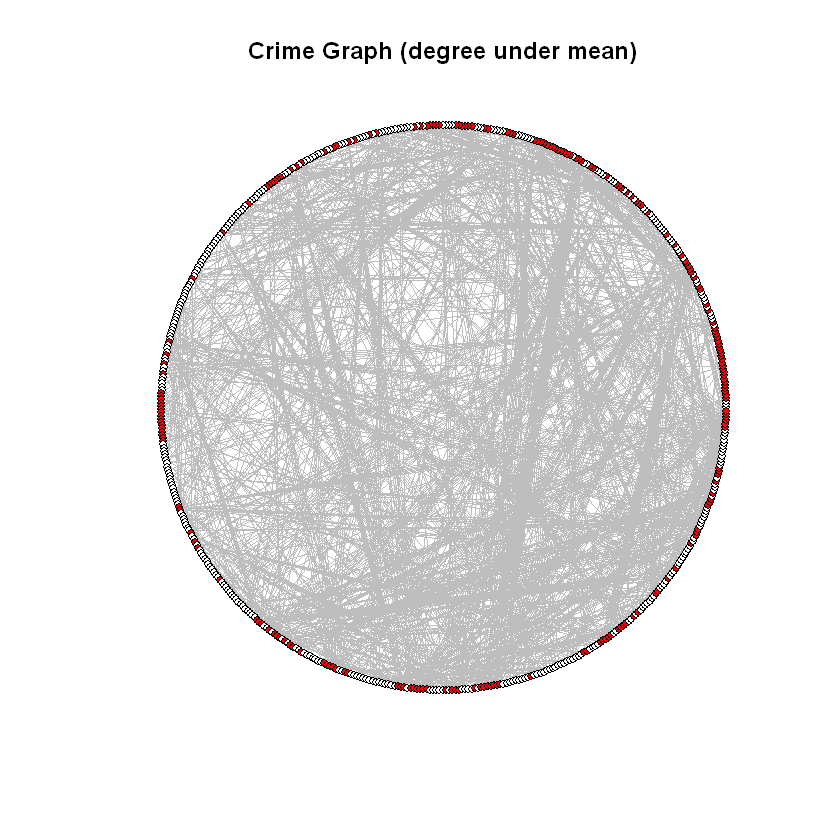

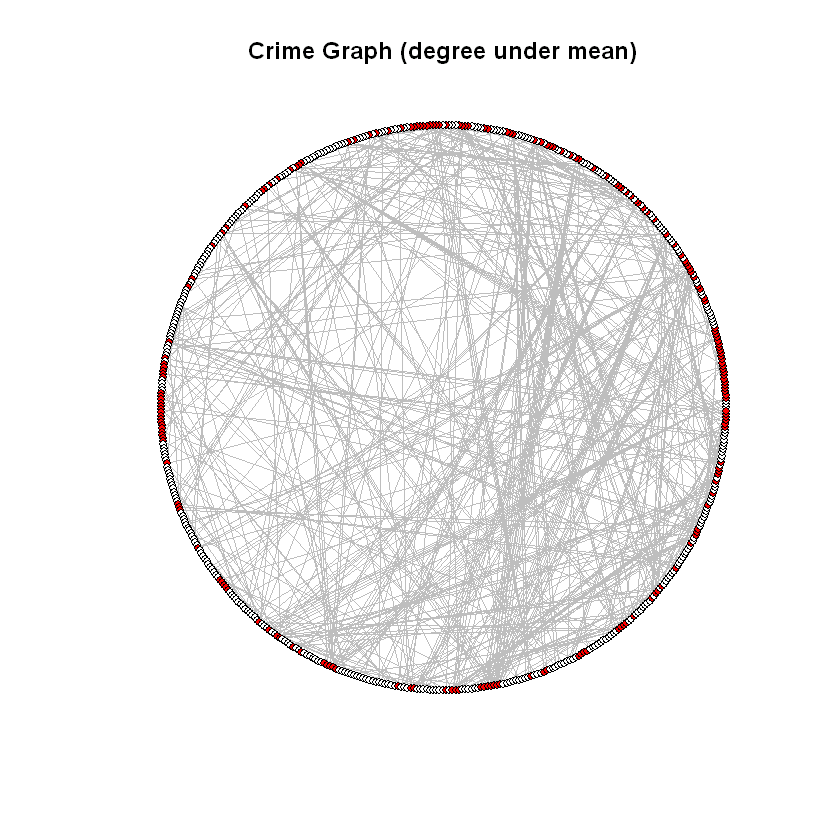

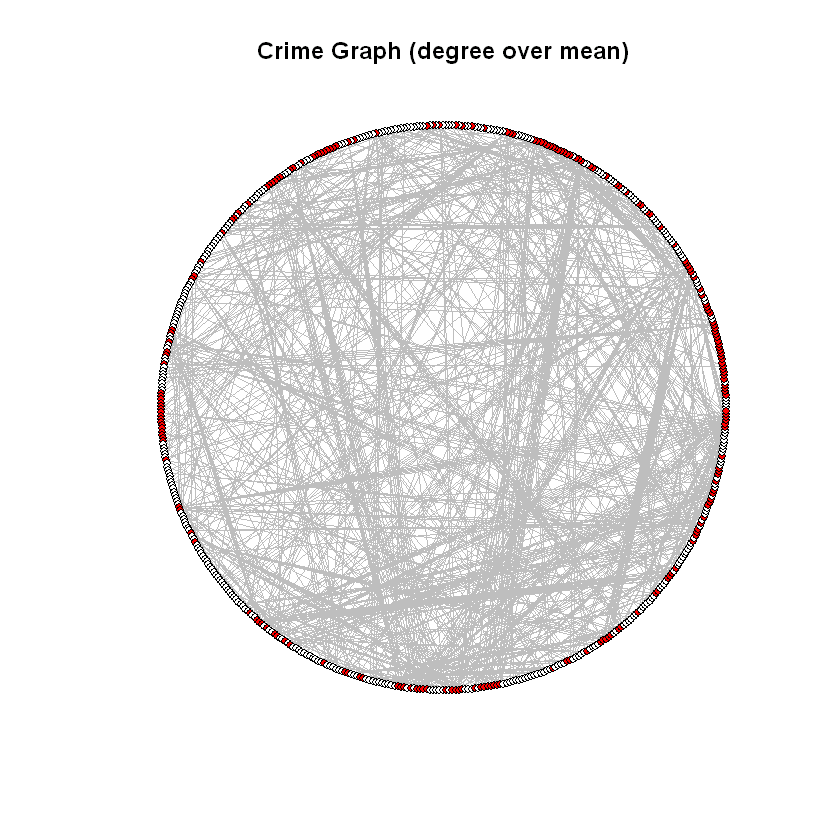

In [8]:
# create needed graph
ned     <- merge(e,e,by="person")
ned     <- cbind(ned$events.x, ned$events.y, ned$person)
ned[,1] <- as.character(ned[,1])
ned[,2] <- as.character(ned[,2])
ned[,3] <- as.character(ned[,3])
I       <- graph.data.frame(ned)
adja    <- get.adjacency(I)

# print additional information
cat(cat("density of the network: ~",round((2*length(E(I)))/(length(V(I))*(length(V(I))-1)),2)), "\n")
cat(cat("reachability/connectedness of the network: ~",round(length(decompose.graph(I)),2)), "components\n")
cat(cat("diameter of the network: ~",round(diameter(I, directed = FALSE, unconnected = TRUE, weights = NULL),2)), "\n\n")

# histogram + normaldist. pdf
histo <- hist(degree(I, mode = "total", loops = TRUE, normalized = TRUE), max(degree(G)), col="yellow")

# boxplot
box <- boxplot(degree(G), mode="total", col="yellow", loops = TRUE, normalized = TRUE)

# delete loops from graph
diag(adja) <- 0
I          <- graph.adjacency(adja, "undirected", weighted=NULL, diag=TRUE, add.colnames=NULL, add.rownames=NA)

# delete all vertices with a degree smaller than the mean degree
Ium <- delete.vertices(I, V(I)[degree(I, v = V(I), mode = "total", loops = TRUE, normalized = FALSE) < mean(degree(I, v = V(I), mode = "total", loops = TRUE, normalized = FALSE))])
Ium <- delete.edges(I, E(I)[degree(I, v = V(I), mode = "total", loops = TRUE, normalized = FALSE) < mean(degree(I, v = V(I), mode = "total", loops = TRUE, normalized = FALSE))])

# delete all vertices with a degree bigger than the mean degree
Iom <- delete.vertices(I, V(I)[degree(I, v = V(I), mode = "total", loops = TRUE, normalized = FALSE) > mean(degree(I, v = V(I), mode = "total", loops = TRUE, normalized = FALSE))])
Iom <- delete.edges(I, E(I)[degree(I, v = V(I), mode = "total", loops = TRUE, normalized = FALSE) > mean(degree(I, v = V(I), mode = "total", loops = TRUE, normalized = FALSE))])

# make some hotspots
V(I)$color   <- 'white'
V(Ium)$color <- 'white'
V(Iom)$color <- 'white'
V(I)$color[degree(I) > mean(degree(I))]       <- 'red'
V(Ium)$color[degree(Ium) > mean(degree(Ium))] <- 'red'
V(Iom)$color[degree(Iom) > mean(degree(Iom))] <- 'red'

# plot the graphs
plot.igraph(I, main = "Crime Graph (degree under mean)", vertex.size=3, vertex.label.color="black", vertex.label = NA,
               edge.color="gray", edge.width=1, edge.curved=FALSE,
               layout=layout.circle)

plot.igraph(Ium, main = "Crime Graph (degree under mean)", vertex.size=3, vertex.label.color="black", vertex.label = NA,
               edge.color="gray", edge.width=1, edge.curved=FALSE,
               layout=layout.circle)

plot.igraph(Iom, main = "Crime Graph (degree over mean)", vertex.size=3, vertex.label.color="black", vertex.label = NA,
               edge.color="gray", edge.width=1, edge.curved=FALSE,
               layout=layout.circle)

#### What does the data tell you?
- 20 Clusterzentren von Verbrechen
- low density network
- diameter = 15

#### What further questions can you derive?
- does the sex of a person p significantly determine the role of p in an event e


## Finishing touch

Handing in the assignment requires following steps:

**Checking if the code works if sequentielly executed**
- restart the kernel to clear the current workspace variables
- run all cells (menu: cell - runall)

**Handin**
- Save current progress ('ctrl + s')
- Commit and push to your own fork
- Dance!

![alt text](./img/spongebob2.gif "Dance!")